In [2]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.datasets import mnist
import itertools
import random

import sys
sys.path.append('../')
from Core_Functions import multi_hot_encoding
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [35]:
# Create an input array of 50,000 samples of 20 random numbers each
x = np.random.randint(0, 10, size=(50000, 2))

# And a one-hot encoded target denoting the index of the maximum of the inputs
y = []
x = []
for ints in range(50000):
    
    x1 = np.random.randint(0,10)
    x2 = np.random.randint(0,10)
    
    if x1!= x2:
        y.append(min(x1,x2))
        x.append([min(x1,x2), max(x1,x2)])


In [36]:
y[:4]

[4, 8, 1, 2]

In [37]:
# Create an input array of 50,000 samples of 20 random numbers each
x_val = np.random.randint(0, 10, size=(50000, 2))

# And a one-hot encoded target denoting the index of the maximum of the inputs
y_val = []
x_val = []
for ints in range(50000):
    
    x1 = np.random.randint(0,10)
    x2 = np.random.randint(0,10)
    
    if x1!= x2:
        y_val.append(min(x1,x2))
        x_val.append([max(x1,x2), min(x1,x2)])


In [38]:
# Conversion to umopy arrays
x = np.array(x)
y = np.array(y)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [39]:
y[:10]

array([4, 8, 1, 2, 4, 2, 0, 2, 0, 5])

In [40]:
# Here instead of using to_categorical, I use my custom multi-hot encoding
"""
train_labels = to_categorical(combo_train_y)
val_labels = to_categorical(combo_val_y)
"""

# y = np.array(multi_hot_encoding.multi_hot_encode(y))
# y_val =  np.array(multi_hot_encoding.multi_hot_encode(y_val))

y = to_categorical(y)
y_val = to_categorical(y_val)

In [41]:
# # Model architecture
# def build_DNN():

#     model = tf.keras.Sequential()
#     model.add(layers.Dense(512, activation = 'relu', input_shape=(2,)))
#     model.add(layers.Dense(10, activation='softmax'))

#     model.compile(optimizer='rmsprop', 
#                 loss='categorical_crossentropy', 
#                 metrics=['accuracy', 'mae'])

#     return model

In [42]:
# DNN_model = build_DNN()
# DNN_model.summary()

In [43]:
# # Fit model
# DNN_model.fit(x, 
#           y, 
#           epochs = 5, 
#           batch_size = 1)


In [44]:
# # Print loss, mae and accuracy
# DNN_eval_model = DNN_model.evaluate(val_images, val_labels)
# DNN_accuracy.append(DNN_eval_model[1])

In [52]:
def build_DNN_10_outputs():

    inputs = keras.Input(shape=(2,))

    dense = layers.Dense(512, activation="relu")
    x = dense(inputs)

    outputs = layers.Dense(9, "sigmoid")(x)
    
    model = keras.Model(inputs = inputs,
                       outputs = outputs)

    model.compile(
        loss=keras.losses.BinaryCrossentropy(),
        optimizer=keras.optimizers.RMSprop(),
        metrics=["accuracy", "mae"],
    )
    
    return model

In [53]:
dnn_model = build_DNN_10_outputs()

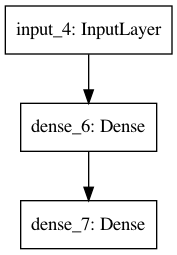

In [54]:
tf.keras.utils.plot_model(dnn_model)

In [55]:
np.array(x).shape

(44927, 2)

In [56]:
y.shape

(44927, 9)

In [57]:
# dnn_model.fit(x, 
#           y, 
#           epochs = 10, 
#           batch_size = 1)

In [58]:
# dnn_model.evaluate(x_val, y_val)

In [59]:
history = dnn_model.fit(x, 
          y, 
          epochs = 5, 
          batch_size = 1,
          validation_data = (x_val, y_val))

val_mae_history = history.history['val_mae']
train_mae_history = history.history['mae']

Epoch 1/5
44927/44927 [==============================] - 37s 817us/step - loss: 0.0498 - accuracy: 0.9127 - mae: 0.0312 - val_loss: 5.1390 - val_accuracy: 0.0219 - val_mae: 0.2585
Epoch 2/5
44927/44927 [==============================] - 37s 825us/step - loss: 0.0128 - accuracy: 0.9792 - mae: 0.0061 - val_loss: 5.7153 - val_accuracy: 0.0219 - val_mae: 0.2374
Epoch 3/5
44927/44927 [==============================] - 37s 813us/step - loss: 0.0101 - accuracy: 0.9868 - mae: 0.0041 - val_loss: 6.9409 - val_accuracy: 0.0219 - val_mae: 0.2255
Epoch 4/5
44927/44927 [==============================] - 36s 805us/step - loss: 0.0103 - accuracy: 0.9900 - mae: 0.0036 - val_loss: 7.7913 - val_accuracy: 0.0219 - val_mae: 0.2132
Epoch 5/5
44927/44927 [==============================] - 37s 815us/step - loss: 0.0107 - accuracy: 0.9907 - mae: 0.0035 - val_loss: 8.2334 - val_accuracy: 0.0219 - val_mae: 0.2088


In [60]:
plt.plot(range(1, len(train_mae_history) + 1), train_mae_history, label = 'Training')
plt.plot(range(1, len(val_mae_history) + 1), val_mae_history, label='Validation')

plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()
plt.savefig('Double_Input_DNN.png')

NameError: name 'average_train_mae_history' is not defined